<a href="https://colab.research.google.com/github/yavuzuzun/projects/blob/main/kaggle_ohio_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the following code, I tried to predict the number of covid19 cases using a twitter data collected during the first few months of the pandemic. During the analysis, I applied different scaling method, regularisation techniques, and dimensionality reduction techniques to improve the r2 score of the prediction.

In [ ]:
import pandas as pd
import numpy as np

# Part 1: Descriptive Analysis

### a) 
Check out this page: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Ohio. In around 250 words, summarize the Covid-19 experience of Ohio. Specifically, focus on how Ohio is different or similar to other US states in terms of the intensity of the pandemic (i), the time and the content of the different policies that have been implemented (ii), and if Wikipedia ‘thinks’ Ohio has dealt with Covid-19 successfully (or not) (iii). [4 points]

Ohio is one of the states applying the to covid_19 precautions earliest. With the government policies applied, intensity of the covid cases and deaths due to covid was much fewer in Ohio compared to other states with similar size like Illinois, Pennsylvania, and Michigan.

They implemented series of precautions for the pandemic. Even before Ohio had its first covid case, governer canceled the Arnold Classic and held a summit on covid for public health officials. After the first covid case in Ohio, they took series of decisions for limiting the contact between the people and lowering the chance for vulnerable groups to get in contact with covid. Dates and precautions are listed as follows:

March 12 - Closing of schools from k-12 for the next 3-weeks

March 12 - Ban on gathering more than 100 people

March 14 - Recommendation postponing elective surgeries

March 16 - Ban on gathering more than 50 people

March 19 - Activation 300 personel for humanitarian aid

March 22 - Stay at home order and the closure on non-essential businesses

March 24 - NASA closed non-infrastructural facilities

March 25 - State passed a bill banning water utilities from disconnecting service, and waiving standardized testing for public schools

April 2 - Extension of stay at home order

April 9 - Demonstration of social distancing

April 20 - Extension of school closing

April 30 - Extension of stay at home order

May - Reopenings of essential facilities like hospital etc.

May 19 - Stay at home order changed to strong recommendation

July 2 - A four-level system was introduced for classifying the severity of outbreaks in individual counties

July 8 - Mandatory face covering 


Wikipedia appreaised the way Ohio handled the pandemic. It supported it with the covid statistics of Ohio.



### b)
Find the average values for all the topic awareness variables. Create a bar chart that shows the average normalized Jaccard similarity-based awareness values for all different types of awareness topics listed above. Order the bars from the biggest to the smallest. Summarize your observations in around 100 words. [4 points]

In [ ]:
# Import training data
covid_ohio_training = pd.read_csv('training_data.csv')

In [ ]:
# Prepare column names taken from the assignment pdf
awareness = "core_cosine, core_cosine_normalized, core_intersection, core_intersection_normalized, core_jaccard, core_jaccard_normalized, domestic_cosine, domestic_cosine_normalized, domestic_intersection, domestic_intersection_normalized, domestic_jaccard, domestic_jaccard_normalized, economy_cosine, economy_cosine_normalized, economy_intersection, economy_intersection_normalized, economy_jaccard, economy_jaccard_normalized, education_cosine, education_cosine_normalized, education_intersection, education_intersection_normalized, education_jaccard, education_jaccard_normalized, entertainment_cosine, entertainment_cosine_normalized, entertainment_intersection, entertainment_intersection_normalized, entertainment_jaccard, entertainment_jaccard_normalized, foreign_cosine, foreign_cosine_normalized, foreign_intersection, foreign_intersection_normalized, foreign_jaccard, foreign_jaccard_normalized, gender_cosine, gender_cosine_normalized, gender_intersection, gender_intersection_normalized, gender_jaccard, gender_jaccard_normalized, health_cosine, health_cosine_normalized, health_intersection, health_intersection_normalized, health_jaccard, health_jaccard_normalized, health_technology_cosine, health_technology_cosine_normalized, health_technology_intersection, health_technology_intersection_normalized, health_technology_jaccard, health_technology_jaccard_normalized, ideology_cosine, ideology_cosine_normalized, ideology_intersection, ideology_intersection_normalized, ideology_jaccard, ideology_jaccard_normalized, illness_cosine, illness_cosine_normalized, illness_intersection, illness_intersection_normalized, illness_jaccard, illness_jaccard_normalized, labor_force_rate, median_household_earnings, median_housing_cost, median_property_value, median_worker_earning, nationalistic_cosine, nationalistic_cosine_normalized, nationalistic_intersection, nationalistic_intersection_normalized, nationalistic_jaccard, nationalistic_jaccard_normalized, percent_25_34, percent_highschool, percent_insure, percent_married, percent_white, politics_cosine, politics_cosine_normalized, politics_democratic_hate_cosine, politics_democratic_hate_cosine_normalized, politics_democratic_hate_intersection, politics_democratic_hate_intersection_normalized, politics_democratic_hate_jaccard, politics_democratic_hate_jaccard_normalized, politics_democratic_love_cosine, politics_democratic_love_cosine_normalized, politics_democratic_love_intersection, politics_democratic_love_intersection_normalized, politics_democratic_love_jaccard, politics_democratic_love_jaccard_normalized, politics_intersection, politics_intersection_normalized, politics_jaccard, politics_jaccard_normalized, politics_republican_hate_cosine, politics_republican_hate_cosine_normalized, politics_republican_hate_intersection, politics_republican_hate_intersection_normalized, politics_republican_hate_jaccard, politics_republican_hate_jaccard_normalized, politics_republican_love_cosine, politics_republican_love_cosine_normalized, politics_republican_love_intersection, politics_republican_love_intersection_normalized, politics_republican_love_jaccard, politics_republican_love_jaccard_normalized, poverty_rate, race_cosine, race_cosine_normalized, race_intersection, race_intersection_normalized, race_jaccard, race_jaccard_normalized, religion_cosine, religion_cosine_normalized, religion_intersection, religion_intersection_normalized, religion_jaccard, religion_jaccard_normalized, social_cosine, social_cosine_normalized, social_intersection, social_intersection_normalized, social_jaccard, social_jaccard_normalized, sports_cosine, sports_cosine_normalized, sports_intersection, sports_intersection_normalized, sports_jaccard, sports_jaccard_normalized"
awareness = awareness.split(",")
awareness = [string.strip() for string in awareness]
awareness_jaccard = [x for x in awareness if 'jaccard' in x]
awareness_jaccard

['core_jaccard',
 'core_jaccard_normalized',
 'domestic_jaccard',
 'domestic_jaccard_normalized',
 'economy_jaccard',
 'economy_jaccard_normalized',
 'education_jaccard',
 'education_jaccard_normalized',
 'entertainment_jaccard',
 'entertainment_jaccard_normalized',
 'foreign_jaccard',
 'foreign_jaccard_normalized',
 'gender_jaccard',
 'gender_jaccard_normalized',
 'health_jaccard',
 'health_jaccard_normalized',
 'health_technology_jaccard',
 'health_technology_jaccard_normalized',
 'ideology_jaccard',
 'ideology_jaccard_normalized',
 'illness_jaccard',
 'illness_jaccard_normalized',
 'nationalistic_jaccard',
 'nationalistic_jaccard_normalized',
 'politics_democratic_hate_jaccard',
 'politics_democratic_hate_jaccard_normalized',
 'politics_democratic_love_jaccard',
 'politics_democratic_love_jaccard_normalized',
 'politics_jaccard',
 'politics_jaccard_normalized',
 'politics_republican_hate_jaccard',
 'politics_republican_hate_jaccard_normalized',
 'politics_republican_love_jaccard',
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

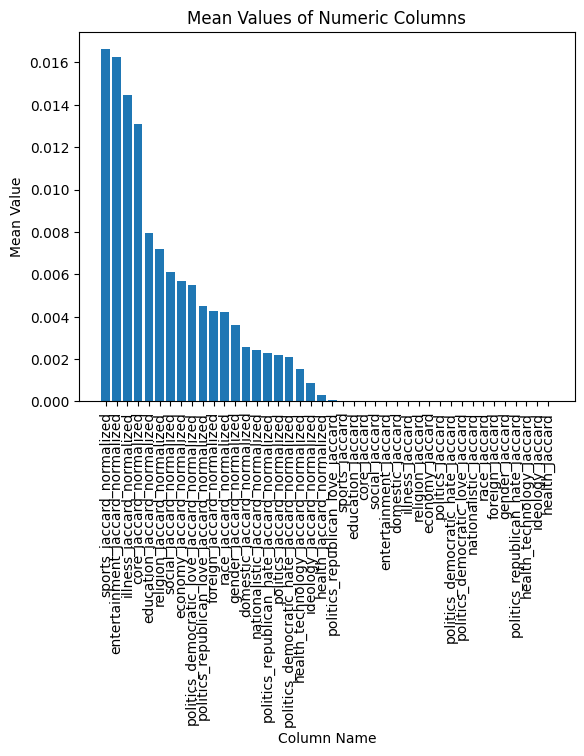

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary and collect mean values
mean_awareness_jaccard = {}
for column in awareness_jaccard:
  mean_awareness_jaccard[column] = covid_ohio_training[column].mean()

# Sort the dictionary by value in descending order
sorted_mean_awareness_jaccard = dict(sorted(mean_awareness_jaccard.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart of the mean values
plt.bar(sorted_mean_awareness_jaccard.keys(), sorted_mean_awareness_jaccard.values())

# Set the title and axis labels
plt.title('Mean Values of Numeric Columns')
plt.xlabel('Column Name')
plt.ylabel('Mean Value')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# export the plot as a PNG file with 300 dpi
plt.savefig('plot.png', dpi=300)
from google.colab import files
files.download('plot.png')

# Display the plot
plt.show()


Covid awareness and illness awareness held the biggest portion of the community's twitter communication after sports and entertainment. These topics got much more attention than education, religion, economiy, and politics related topics. That shows how seriously the community evaluates the pandemic and pandemic related issues.

### c) 
Focus on the core_jaccard_normalized variable. Create a bar chart that shows the aggregated mean awareness value for each county. Order the bars from the biggest to the smallest. Which county has the highest awareness? Summarize your observations in around 100 words. [4 points]

In [ ]:
# calculate the aggregate mean jaccard values
# find numeric columns
columns_training = covid_ohio_training.columns
numeric_columns_training = [x for x in columns_training if covid_ohio_training[x].dtype != 'object']

# calculate mean values over unique county elements by using groupby method
aggregate_mean_by_county = \
covid_ohio_training.groupby('county')[numeric_columns_training].mean()
aggregate_mean_by_county

,cases,deaths,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
county,,,,,,,,,,,,,,,,,,,,,
Adams,6.027778,0.000000,108.777778,0.000019,0.000128,0.001664,0.000001,0.000053,0.000057,0.000015,...,50.0,7.5,619.0,35560.0,19406.0,89.9,51.1,23.8,98000.0,0.975113
Allen,82.515152,3.818182,875.454545,0.000026,0.000150,0.002277,0.000019,0.000011,0.000022,0.000005,...,63.0,7.2,712.0,44103.0,24161.0,92.1,48.0,15.0,110900.0,0.830544
Ashland,6.658537,0.000000,178.463415,0.000013,0.000080,0.001153,0.000017,0.000014,0.000000,0.000000,...,61.6,4.2,753.0,48003.0,25703.0,90.5,52.8,14.2,122000.0,0.968874
Ashtabula,79.648649,2.189189,380.297297,0.000018,0.000087,0.001550,0.000010,0.000006,0.000006,0.000008,...,54.7,7.4,695.0,40544.0,23117.0,90.0,47.9,19.8,106300.0,0.929083
Athens,7.000000,0.900000,836.200000,0.000063,0.000329,0.005516,0.000012,0.000009,0.000006,0.000004,...,52.7,8.7,739.0,33872.0,14351.0,93.1,34.3,30.2,116500.0,0.909354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,82.600000,2.828571,179.857143,0.000019,0.000117,0.001673,0.000012,0.000014,0.000027,0.000000,...,55.7,4.2,614.0,43509.0,24710.0,91.8,52.7,15.5,119400.0,0.961476
Wayne,92.361111,5.750000,400.916667,0.000035,0.000194,0.002989,0.000019,0.000010,0.000006,0.000007,...,64.0,4.0,762.0,50383.0,26658.0,87.2,55.1,13.0,140100.0,0.950541
Williams,5.558824,0.264706,169.147059,0.000012,0.000097,0.001052,0.000004,0.000000,0.000011,0.000000,...,62.7,5.0,676.0,42492.0,25833.0,95.0,52.6,13.5,94200.0,0.955155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

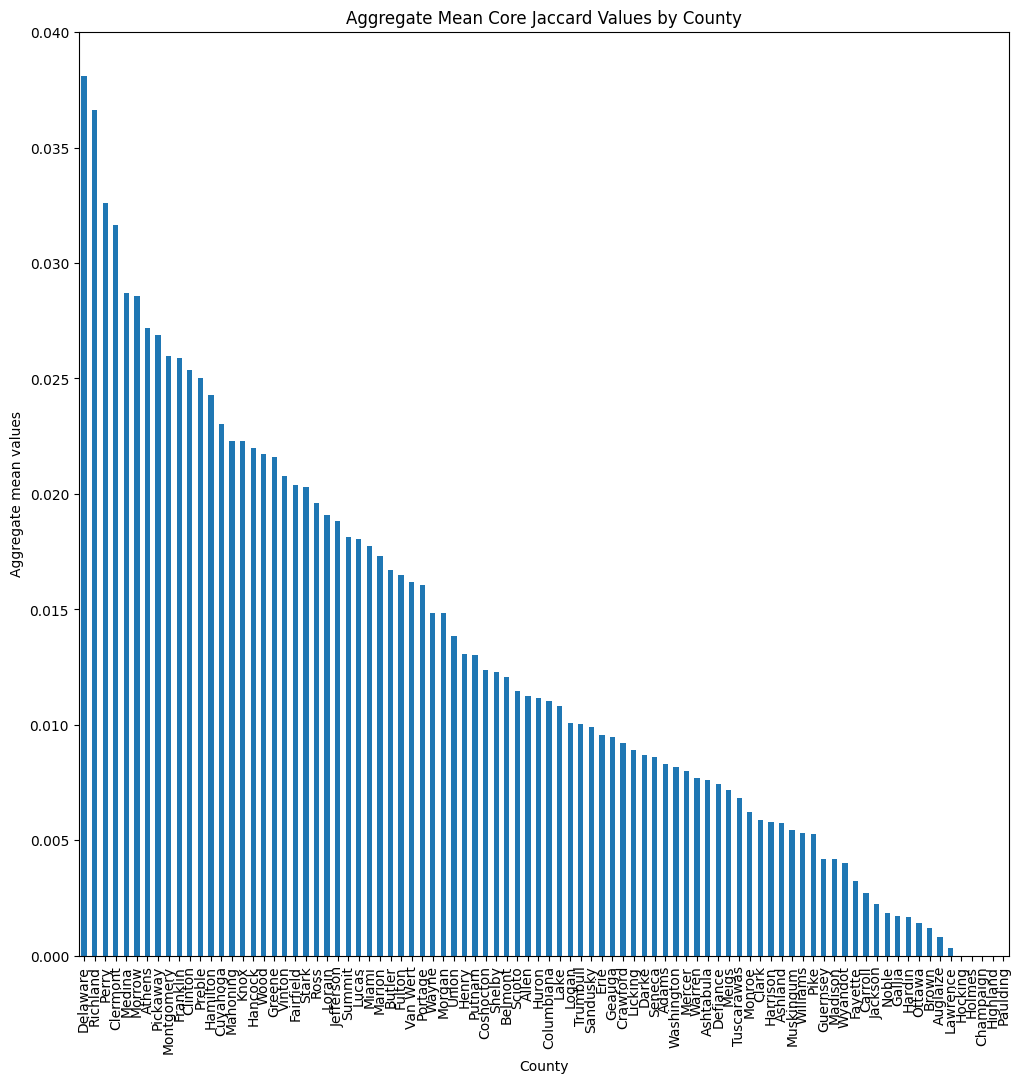

In [ ]:
# Draw bar plot for core_jaccard_similarity
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = 10

# Sort the mean values from largest to smallest
sorted_aggregate_mean = aggregate_mean_by_county['core_jaccard_normalized'].sort_values(ascending=False)

# Plot the sorted mean values as a bar plot
sorted_aggregate_mean.plot(kind='bar')

# Add labels to the x-axis and y-axis
plt.title('Aggregate Mean Core Jaccard Values by County')
plt.xlabel('County')
plt.ylabel('Aggregate mean values')

# export the plot as a PNG file with 300 dpi
plt.savefig('aggregate_mean_jaccard.png', dpi=300)
from google.colab import files
files.download('aggregate_mean_jaccard.png')

# Show the plot
plt.show()

Deleware had the highest awareness score according to the core jaccard similarity score. According to the resulting distribution, which is linear in normal scale, awareness was not concentrated at a few county but it was a common agenda for the state.

### d) 
Create two county-level maps of Ohio (an example is provided in the first page of the assignment). Using colors, show the number of average Covid-19 cases per capita and the number of average Covid-19 deaths per capita by county. What are the top-5 counties with high number of per capita cases and per capita number of deaths? Summarize your observations in around 100 words. [4 points]

In [ ]:
# Create new columns for per_capita_cases and per_capita_deaths
covid_ohio_training['per_capita_cases'] = covid_ohio_training['cases']/covid_ohio_training['total_pop']
covid_ohio_training['per_capita_deaths'] = covid_ohio_training['deaths']/covid_ohio_training['total_pop']

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

# Load the county-level shapefile of Ohio into a GeoDataFrame
# All OH_precincts variables should be uploaded if you run it in Colab.
ohio_counties = gpd.read_file('OH_precincts.shp')

In [ ]:
# Create a dictionary for these values and assign these values to corresponding rows of the geopandas data frame.
# Start by updating the aggregate_mean_by_county data frame
# Update numeric columns list
columns_training = covid_ohio_training.columns
numeric_columns_training = [x for x in columns_training if covid_ohio_training[x].dtype != 'object']

# Calculate mean values over unique county elements by using groupby method
aggregate_mean_by_county = \
covid_ohio_training.groupby('county')[numeric_columns_training].mean()
aggregate_mean_by_county['county'] = aggregate_mean_by_county.index

county_cases_dict = dict(zip(aggregate_mean_by_county.county, aggregate_mean_by_county.per_capita_cases))
county_deaths_dict = dict(zip(aggregate_mean_by_county.county, aggregate_mean_by_county.per_capita_deaths))

In [ ]:
ohio_counties['per_capita_cases'] = ohio_counties['COUNTY'].map(county_cases_dict)
ohio_counties['per_capita_deaths'] = ohio_counties['COUNTY'].map(county_deaths_dict)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

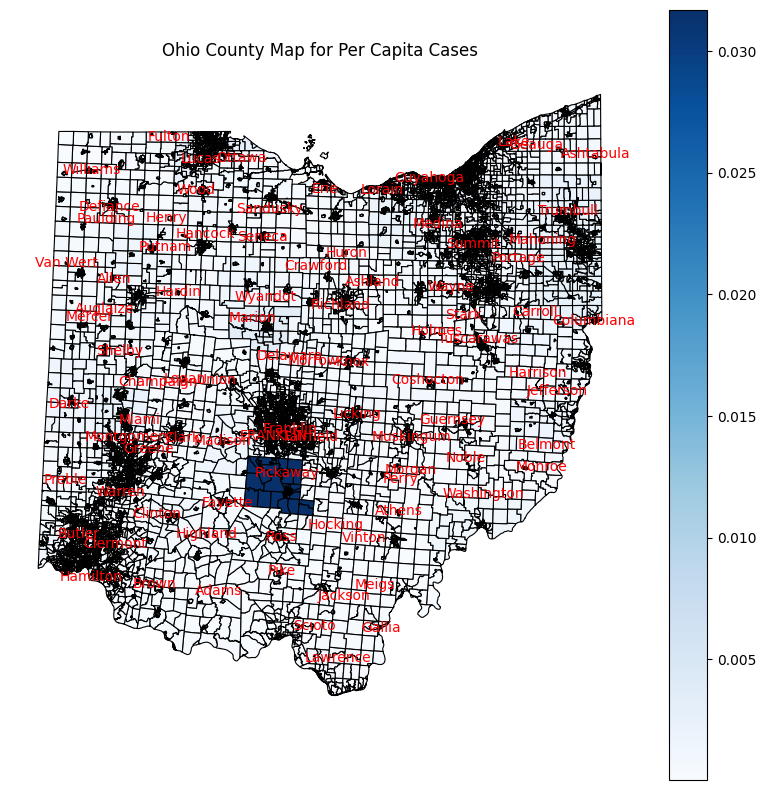

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ohio_counties.plot(column='per_capita_cases', cmap='Blues', linewidth=0.8, edgecolor='black', ax=ax, legend=True)

# Add annotations for county names
annotated_counties = []
for idx, row in ohio_counties.iterrows():
    county_name = row['COUNTY']
    if county_name not in annotated_counties:
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        plt.annotate(text=county_name, xy=(x, y), xytext=(x+500, y), fontsize=10, color='red', ha='center', va='center')
        annotated_counties.append(county_name)

# Remove axis ticks and labels
ax.set_axis_off()

# Add a title
ax.set_title('Ohio County Map for Per Capita Cases')


# export the plot as a PNG file with 300 dpi
plt.savefig('per_capita_cases.png', dpi=300)
from google.colab import files
files.download('per_capita_cases.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

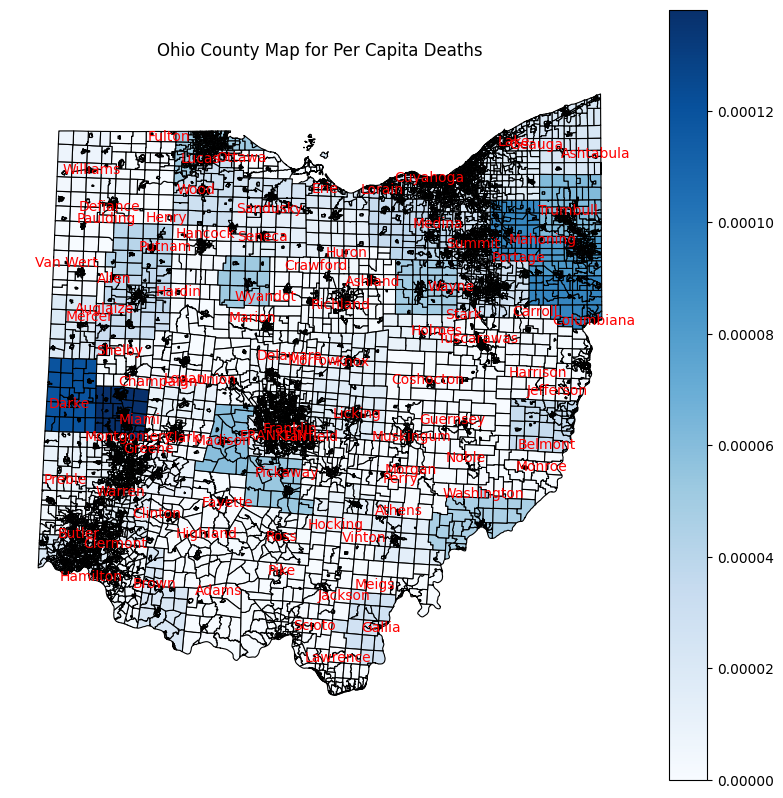

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ohio_counties.plot(column='per_capita_deaths', cmap='Blues', linewidth=0.8, edgecolor='black', ax=ax, legend=True)

# Add annotations for county names
annotated_counties = []
for idx, row in ohio_counties.iterrows():
    county_name = row['COUNTY']
    if county_name not in annotated_counties:
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        plt.annotate(text=county_name, xy=(x, y), xytext=(x+500, y), fontsize=10, color='red', ha='center', va='center')
        annotated_counties.append(county_name)

# Remove axis ticks and labels
ax.set_axis_off()

# Add a title
ax.set_title('Ohio County Map for Per Capita Deaths')

# export the plot as a PNG file with 300 dpi
plt.savefig('per_capita_deaths.png', dpi=300)
from google.colab import files
files.download('per_capita_deaths.png')

In [ ]:
# Get highest 5 per capita case and per capita death

top_five_cases = aggregate_mean_by_county.nlargest(5, 'per_capita_cases')
top_five_deaths = aggregate_mean_by_county.nlargest(5, 'per_capita_deaths')

print(top_five_cases['per_capita_cases'])
print(top_five_deaths['per_capita_deaths'])

county
Pickaway      0.031700
Marion        0.003405
Lucas         0.002678
Columbiana    0.002627
Mahoning      0.002514
Name: per_capita_cases, dtype: float64
county
Miami         0.000138
Darke         0.000120
Columbiana    0.000093
Portage       0.000092
Mahoning      0.000082
Name: per_capita_deaths, dtype: float64


High number of covid cases does not imply high number of deaths during the first few months of the pandemic in Ohio. Even if there are common counties in the first five highest per_capita_cases and per_capita_deaths lists, the geographical distribution of the cases and deaths are significantly different.

In [ ]:
# print(len(ohio_counties))

# Print the name of each layer in the shapefile
# for layer_name in ohio_counties:
#     print(layer_name)

### e) 
Calculate the average normalized Jaccard awareness scores for every day (starting from Day 1). Create a line chart with overlapping lines in which each line represents the evolution of awareness levels for each topic.4 The x-axis of the line chart should correspond to ‘Days’, and the y-axis of the line chart should represent the level of awareness. What are the trends in the graph? Summarize your observations in around 100 words. [4 points]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

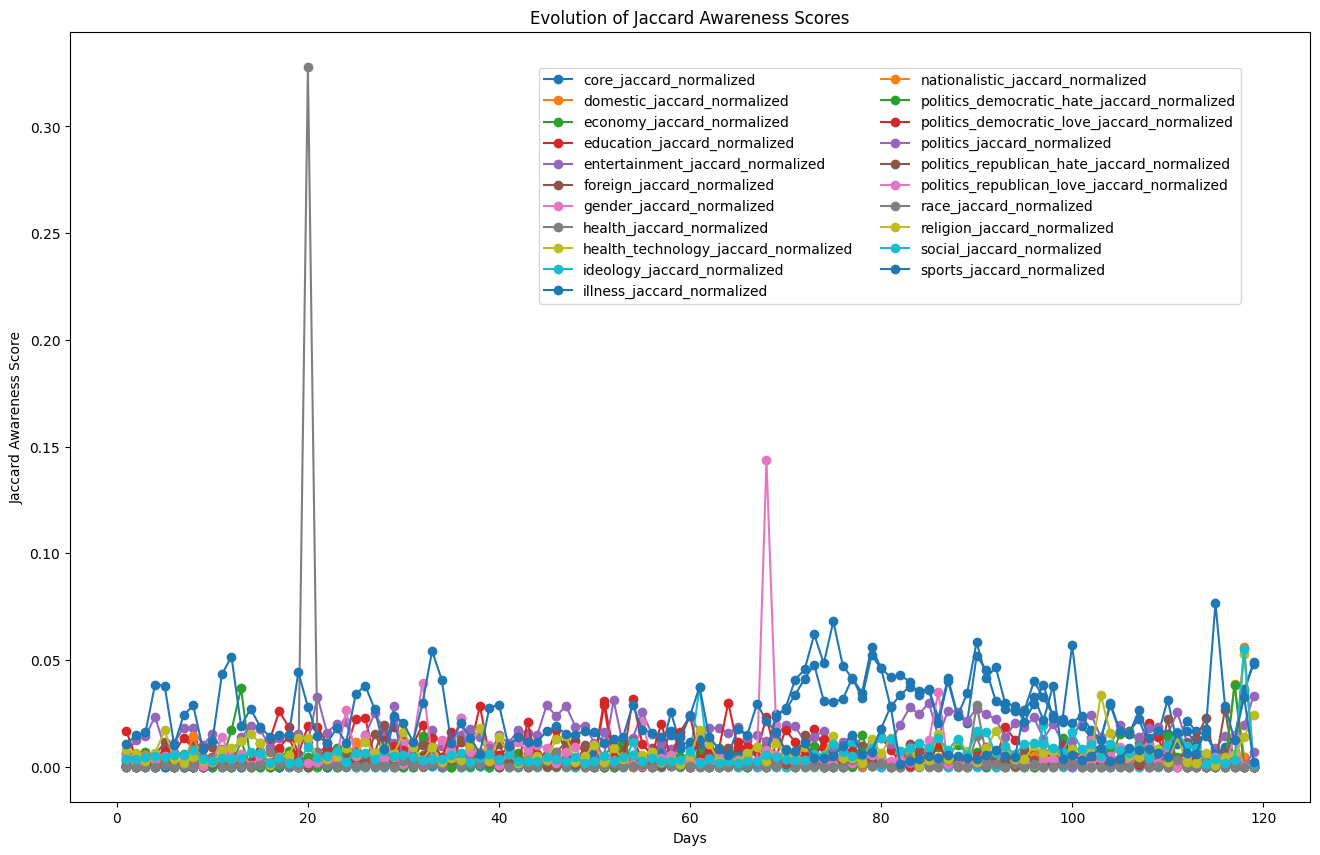

In [ ]:
# Subset the data frame to keep only the columns representing Jaccard awareness scores
awareness_jaccard_normalized = [x for x in awareness_jaccard if 'normalized' in x]
jaccard_normalized_covid_ohio_training = covid_ohio_training[awareness_jaccard_normalized]

# Calculate the mean score for each day using the groupby method
mean_scores = jaccard_normalized_covid_ohio_training.groupby\
(covid_ohio_training['date_index_converted']).mean()
mean_scores['Days'] = mean_scores.index
mean_scores['Days'] = mean_scores['Days'].apply(lambda x: int(x.split('_')[1]))
mean_scores.index = mean_scores['Days']
mean_scores.drop('Days', axis=1, inplace=True)
mean_scores = mean_scores.sort_index()

# Create a line chart
plt.rcParams['figure.figsize'] = (16.0, 10.0)
mean_scores.plot(kind='line', marker='o')
plt.xlabel('Days')
plt.ylabel('Jaccard Awareness Score')
plt.title('Evolution of Jaccard Awareness Scores')

plt.legend(loc='center right', bbox_to_anchor=(0.95, 0.8), ncol=2)

# export the plot as a PNG file with 300 dpi
plt.savefig('time_progress_jaccard.png', dpi=300)
from google.colab import files
files.download('time_progress_jaccard.png')

plt.show()

Jaccard values were oscillatory for most of the epochs. There is an unsusual pattern between day 70 and day 100. Around day 70 there is a sharp peak for gender awareness jaccard score. Starting from this peak, core awarenes, and illness awareness scores quickly increases and decreases slowly afterwards until day 100. Around day 100 health awareness score peaks and awareness scores get back to their general pattern. This may be due to a gender awareness related gathering resulted in spread of the covid during that period.  

# Part 2: Model Creation and Prediction


In [ ]:
# Since Random Forest can handle a large number of input features without overfitting,
# and it is robust to noisy data and outliers, I started with a random forest regressor.
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Import training data
covid_ohio_training = pd.read_csv('training_data.csv')
covid_ohio_training['per_capita_deaths'] =\
covid_ohio_training['deaths']/covid_ohio_training['total_pop']

# Assign x and y values using the training data
X_train = covid_ohio_training.drop('cases', axis=1)
y_train = covid_ohio_training['cases']
X_train['days'] = \
X_train['date_index_converted'].apply(lambda x: int(x.split('_')[1])) # Encode days as continuous variable
X_train_encoded = pd.get_dummies(X_train, columns=['county','date_index_converted'])  # Encode categorical variables
X_train_encoded

,deaths,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,...,date_index_converted_day_90,date_index_converted_day_91,date_index_converted_day_92,date_index_converted_day_93,date_index_converted_day_94,date_index_converted_day_95,date_index_converted_day_96,date_index_converted_day_97,date_index_converted_day_98,date_index_converted_day_99
0,0,363,0.000000,0.000000,0.000000,0.000011,0.000151,0.000053,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
1,0,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
2,0,769,0.000076,0.000370,0.006502,0.000039,0.000000,0.000000,0.0,0.00000,...,1,0,0,0,0,0,0,0,0,0
3,0,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
4,0,554,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,0,6121,0.000094,0.000491,0.008169,0.000041,0.000011,0.000003,0.0,0.00001,...,0,0,0,0,0,0,0,0,0,0
3137,0,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
3138,0,929,0.000013,0.000105,0.001076,0.000009,0.000012,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
3139,0,144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_encoded.columns

Index(['deaths', 'county_data_length', 'core_jaccard', 'core_cosine',
       'core_intersection', 'social_jaccard', 'politics_jaccard',
       'politics_democratic_love_jaccard', 'nationalistic_jaccard',
       'politics_republican_hate_jaccard',
       ...
       'date_index_converted_day_90', 'date_index_converted_day_91',
       'date_index_converted_day_92', 'date_index_converted_day_93',
       'date_index_converted_day_94', 'date_index_converted_day_95',
       'date_index_converted_day_96', 'date_index_converted_day_97',
       'date_index_converted_day_98', 'date_index_converted_day_99'],
      dtype='object', length=350)

In [ ]:
# Train a random forest regressor on the training set
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=333)
model.fit(X_train_encoded, y_train)

# Make predictions on the training set
y_pred = model.predict(X_train_encoded)

# Calculate the r-squared value
r_squared = r2_score(y_train, y_pred)
print(f"R-squared: {r_squared:.3f}")

R-squared: 0.974


In [ ]:
# Now we can move on the test set
# Load and preprocess the test data. 
covid_ohio_test = pd.read_csv('test_data.csv')
covid_ohio_test['per_capita_deaths'] = covid_ohio_test['deaths']/covid_ohio_test['total_pop']
covid_ohio_test.index = covid_ohio_test['index']
covid_ohio_test.drop('index', axis=1, inplace=True)

X_test = covid_ohio_test
X_test['days'] = \
X_test['date_index_converted'].apply(lambda x: int(x.split('_')[1])) # Encode days as continuous variable
X_test_encoded = pd.get_dummies(X_test, columns=['county','date_index_converted'])  # Encode categorical variables
X_test_encoded

,deaths,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,...,date_index_converted_day_90,date_index_converted_day_91,date_index_converted_day_92,date_index_converted_day_93,date_index_converted_day_94,date_index_converted_day_95,date_index_converted_day_96,date_index_converted_day_97,date_index_converted_day_98,date_index_converted_day_99
index,,,,,,,,,,,,,,,,,,,,,
0,0,40,0.000000,0.000000,0.000000,0.000106,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
1,3,17,0.000661,0.002567,0.058824,0.000494,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
2,0,1210,0.000000,0.000000,0.000000,0.000013,0.000009,0.000036,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
3,0,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
4,0,4328,0.000005,0.000036,0.000462,0.000043,0.000033,0.000015,0.000014,0.00002,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,0,24,0.000000,0.000000,0.000000,0.000000,0.000473,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
7327,3,128,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
7328,0,194,0.000000,0.000000,0.000000,0.000043,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Make predictions on the test set
y_pred_test = model.predict(X_test_encoded)
y_pred_test

array([  1.46993894, 153.27286407,   1.46993894, ...,   1.46993894,
       622.45652615,   1.46993894])

In [ ]:
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_test)),'Cases': y_pred_test}) 

In [ ]:
submission_df

,Index,Cases
0,0,1.469939
1,1,153.272864
2,2,1.469939
3,3,1.469939
4,4,1.469939
...,...,...
7326,7326,1.469939
7327,7327,854.099021
7328,7328,1.469939
7329,7329,622.456526


In [ ]:
# Export submission data frame as csv file
from google.colab import files

submission_df.to_csv('submission_df.csv', index=False)
files.download('submission_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Resulting R2 value was 0.74991, which is ver low. So, I will apply a more systematic approach for the solution implementing different regressors, hyperparameters and normalization conditions.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

np.random.seed(333)

# Scale the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_encoded)
X_test_std = scaler.fit_transform(X_test_encoded)

# Define models and hyperparameters
models = {'Linear Regression': {'model': LinearRegression(),
                                'params': {}},
          'Decision Tree Regressor': {'model': DecisionTreeRegressor(),
                                      'params': {'max_depth': [5, 10, 20, 50]}},
          'Random Forest Regressor': {'model': RandomForestRegressor(),
                                      'params': {'n_estimators': [10, 50, 100],
                                                 'max_depth': [5, 10, 20, 50]}},
          'Support Vector Regressor': {'model': SVR(),
                                       'params': {'kernel': ['linear', 'rbf'],
                                                   'C': [0.1, 1, 10]}}}

# Evaluate each model with different hyperparameters
results_std = {}
for model_name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']
    for p in params:
        param_values = params[p]
        for val in param_values:
            # train the model and collect R2 values for y_train
            model.set_params(**{p: val})
            model.fit(X_train_std, y_train)
            y_pred = model.predict(X_train_std)
            r2 = r2_score(y_train, y_pred)

            # predict y array for the test set
            y_pred_test = model.predict(X_test_std)

            # assign as dictionary elements
            if model_name in results_std:
                results_std[model_name].append({'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test})
            else:
                results_std[model_name] = [{'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test}]


In [ ]:
# Print results
for model_name, model_results in results_std.items():
    print(model_name)
    for result in model_results:
        print(f"\t{result['params']}:\t{result['r2_score']}")

Decision Tree Regressor
	max_depth=5:	0.9823097882788046
	max_depth=10:	0.999358634179732
	max_depth=20:	0.9999990789878951
	max_depth=50:	1.0
Random Forest Regressor
	n_estimators=10:	0.977220041624278
	n_estimators=50:	0.9787823579937478
	n_estimators=100:	0.9854573050749189
	max_depth=5:	0.9780277180589831
	max_depth=10:	0.9855135486602414
	max_depth=20:	0.9828356180337398
	max_depth=50:	0.9852377463228159
Support Vector Regressor
	kernel=linear:	0.42360229706547614
	kernel=rbf:	-0.0280986278108577
	C=0.1:	-0.03336430555342895
	C=1:	-0.0280986278108577
	C=10:	0.002273601424907734


In [ ]:
# Repeat the same procedure for MinMax scaling
from sklearn.preprocessing import MinMaxScaler

np.random.seed(333)

# Scale the features
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train_encoded)
X_test_minmax = scaler.fit_transform(X_test_encoded)

# Use the models and hyperparameters defined above

# Evaluate each model with different hyperparameters
results_minmax = {}
for model_name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']
    for p in params:
        param_values = params[p]
        for val in param_values:
            model.set_params(**{p: val})
            model.fit(X_train_minmax, y_train)
            y_pred = model.predict(X_train_minmax)
            r2 = r2_score(y_train, y_pred)

            # predict y array for the test set
            y_pred_test = model.predict(X_test_minmax)

            # assign as dictionary elements
            if model_name in results_minmax:
                results_minmax[model_name].append({'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test})
            else:
                results_minmax[model_name] = [{'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test}]


In [ ]:
# Print results
for model_name, model_results in results_minmax.items():
    print(model_name)
    for result in model_results:
        print(f"\t{result['params']}:\t{result['r2_score']}")

Decision Tree Regressor
	max_depth=5:	0.9823097882788046
	max_depth=10:	0.999358634179732
	max_depth=20:	0.9999990789878951
	max_depth=50:	1.0
Random Forest Regressor
	n_estimators=10:	0.9775546931350223
	n_estimators=50:	0.9788769806898259
	n_estimators=100:	0.9854370267710165
	max_depth=5:	0.9780513845355998
	max_depth=10:	0.9855119667950765
	max_depth=20:	0.9828306314246554
	max_depth=50:	0.9852328425548316
Support Vector Regressor
	kernel=linear:	0.05793079767046261
	kernel=rbf:	0.0020732541312854513
	C=0.1:	-0.032899827707316254
	C=1:	-0.025906478837182556
	C=10:	0.0020732541312854513


MinMax scaling showed no significant change for Decision Tree Regressor and Random Forest Regressor. However, the performance of the Support Vector Regressor plummeted after we change scaling from StandardScaler to MinMaxScaler. For both scalers Decision Tree Regressor performed slightly better than Random Forest Regressor. It is an expected result since Decision Tree Regressor tend to overfit the training data whereas Random Forest Regressor tend to reduce variance for the predictions and not to overfit.

In [ ]:
# export y_pred values for testing in Kaggle
y_pred_DTR_50 = results_std['Decision Tree Regressor'][3]['y_pred_test']
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_DTR_50)),'Cases': y_pred_DTR_50}) 

submission_df.to_csv('y_pred_DTR_50.csv', index=False)
files.download('y_pred_DTR_50.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# export y_pred values for testing in Kaggle
y_pred_RFR_50 = results_std['Random Forest Regressor'][6]['y_pred_test']
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_RFR_50)),'Cases': y_pred_RFR_50}) 

submission_df.to_csv('y_pred_RFR_50.csv', index=False)
files.download('y_pred_RFR_50.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### The algorithms we tried until now ddid result in a high r2 value in Kaggle. Sparceness of the data set maybe the reason behind it. We will implement dimensionality reduction techniques to simplify the data.

In [ ]:
from sklearn.decomposition import PCA

# Merge the training and test sets
X = np.vstack((X_train_std, X_test_std))

# Apply dimensionality reduction using PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Recover the training and test sets with reduced dimensions
X_train_reduced = X_reduced[:len(X_train_std)]
X_test_reduced = X_reduced[len(X_train_std):]

np.random.seed(333)

# Define models and hyperparameters
models = {'Linear Regression': {'model': LinearRegression(),
                                'params': {}},
          'Decision Tree Regressor': {'model': DecisionTreeRegressor(),
                                      'params': {'max_depth': [5, 10, 20, 50]}},
          'Random Forest Regressor': {'model': RandomForestRegressor(),
                                      'params': {'n_estimators': [10, 50, 100],
                                                 'max_depth': [5, 10, 20, 50]}},
          'Support Vector Regressor': {'model': SVR(),
                                       'params': {'kernel': ['linear', 'rbf'],
                                                   'C': [0.1, 1, 10]}}}

# Evaluate each model with different hyperparameters
results_pca = {}
for model_name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']
    for p in params:
        param_values = params[p]
        for val in param_values:
            # train the model and collect R2 values for y_train
            model.set_params(**{p: val})
            model.fit(X_train_reduced, y_train)
            y_pred = model.predict(X_train_reduced)
            r2 = r2_score(y_train, y_pred)

            # predict y array for the test set
            y_pred_test = model.predict(X_test_reduced)

            # assign as dictionary elements
            if model_name in results_pca:
                results_pca[model_name].append({'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test})
            else:
                results_pca[model_name] = [{'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test}]


In [ ]:
# Print results
for model_name, model_results in results_pca.items():
    print(model_name)
    for result in model_results:
        print(f"\t{result['params']}:\t{result['r2_score']}")

Decision Tree Regressor
	max_depth=5:	0.41281097612916173
	max_depth=10:	0.8091987893114306
	max_depth=20:	0.9987646503162094
	max_depth=50:	1.0
Random Forest Regressor
	n_estimators=10:	0.8060611476634503
	n_estimators=50:	0.8428478634048977
	n_estimators=100:	0.8687680373629301
	max_depth=5:	0.4167031581263887
	max_depth=10:	0.7777363597633071
	max_depth=20:	0.8544397200102015
	max_depth=50:	0.8652186274532664
Support Vector Regressor
	kernel=linear:	-0.0317161521522864
	kernel=rbf:	-0.028494316836414457
	C=0.1:	-0.03223293609649969
	C=1:	-0.028494316836414457
	C=10:	-0.020592282879521973


In [ ]:
y_pred_DTR_50_pca = results_std['Decision Tree Regressor'][3]['y_pred_test']
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_DTR_50_pca)),'Cases': y_pred_DTR_50_pca}) 

submission_df.to_csv('y_pred_DTR_50_pca.csv', index=False)
files.download('y_pred_DTR_50_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### PCA resulted in poorer results. I will try spectral embedding next.

In [ ]:
from sklearn.manifold import SpectralEmbedding

# Merge the training and test sets
X = np.vstack((X_train_std, X_test_std))

# Apply dimensionality reduction using PCA
SE = SpectralEmbedding(n_components=3)
X_reduced = SE.fit_transform(X)

# Recover the training and test sets with reduced dimensions
X_train_reduced = X_reduced[:len(X_train_std)]
X_test_reduced = X_reduced[len(X_train_std):]

np.random.seed(333)

# Define models and hyperparameters
models = {'Linear Regression': {'model': LinearRegression(),
                                'params': {}},
          'Decision Tree Regressor': {'model': DecisionTreeRegressor(),
                                      'params': {'max_depth': [5, 10, 20, 50]}},
          'Random Forest Regressor': {'model': RandomForestRegressor(),
                                      'params': {'n_estimators': [10, 50, 100],
                                                 'max_depth': [5, 10, 20, 50]}},
          'Support Vector Regressor': {'model': SVR(),
                                       'params': {'kernel': ['linear', 'rbf'],
                                                   'C': [0.1, 1, 10]}}}

# Evaluate each model with different hyperparameters
results_SE = {}
for model_name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']
    for p in params:
        param_values = params[p]
        for val in param_values:
            # train the model and collect R2 values for y_train
            model.set_params(**{p: val})
            model.fit(X_train_reduced, y_train)
            y_pred = model.predict(X_train_reduced)
            r2 = r2_score(y_train, y_pred)

            # predict y array for the test set
            y_pred_test = model.predict(X_test_reduced)

            # assign as dictionary elements
            if model_name in results_SE:
                results_SE[model_name].append({'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test})
            else:
                results_SE[model_name] = [{'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test}]


In [ ]:
# Print results
for model_name, model_results in results_SE.items():
    print(model_name)
    for result in model_results:
        print(f"\t{result['params']}:\t{result['r2_score']}")

Decision Tree Regressor
	max_depth=5:	0.49856160695822027
	max_depth=10:	0.9473914344757456
	max_depth=20:	0.9999986336680883
	max_depth=50:	1.0
Random Forest Regressor
	n_estimators=10:	0.8464358969660716
	n_estimators=50:	0.8858567621856402
	n_estimators=100:	0.8980830579617609
	max_depth=5:	0.6033379958487667
	max_depth=10:	0.8678159977285096
	max_depth=20:	0.8915744959463643
	max_depth=50:	0.903076836830114
Support Vector Regressor
	kernel=linear:	-0.03400271048465098
	kernel=rbf:	-0.02973547920562214
	C=0.1:	-0.033192203470962856
	C=1:	-0.02973547920562214
	C=10:	-0.014415939651919452


In [ ]:
y_pred_RFG_50_SE = results_std['Random Forest Regressor'][5]['y_pred_test']
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_RFG_50_SE)),'Cases': y_pred_RFG_50_SE}) 

submission_df.to_csv('y_pred_RFG_50_SE.csv', index=False)
files.download('y_pred_RFG_50_SE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Spectral embedding resulted in much better prediction. However, it is still poorer than the original results. I will use tsne next.

In [ ]:
from sklearn.manifold import TSNE

# Merge the training and test sets
X = np.vstack((X_train_std, X_test_std))

# Apply dimensionality reduction using PCA
tSNE = TSNE(n_components=3)
X_reduced = tSNE.fit_transform(X)

# Recover the training and test sets with reduced dimensions
X_train_reduced = X_reduced[:len(X_train_std)]
X_test_reduced = X_reduced[len(X_train_std):]

np.random.seed(333)

# Define models and hyperparameters
models = {'Linear Regression': {'model': LinearRegression(),
                                'params': {}},
          'Decision Tree Regressor': {'model': DecisionTreeRegressor(),
                                      'params': {'max_depth': [5, 10, 20, 50]}},
          'Random Forest Regressor': {'model': RandomForestRegressor(),
                                      'params': {'n_estimators': [10, 50, 100],
                                                 'max_depth': [5, 10, 20, 50]}},
          'Support Vector Regressor': {'model': SVR(),
                                       'params': {'kernel': ['linear', 'rbf'],
                                                   'C': [0.1, 1, 10]}}}

# Evaluate each model with different hyperparameters
results_tsne = {}
for model_name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']
    for p in params:
        param_values = params[p]
        for val in param_values:
            # train the model and collect R2 values for y_train
            model.set_params(**{p: val})
            model.fit(X_train_reduced, y_train)
            y_pred = model.predict(X_train_reduced)
            r2 = r2_score(y_train, y_pred)

            # predict y array for the test set
            y_pred_test = model.predict(X_test_reduced)

            # assign as dictionary elements
            if model_name in results_tsne:
                results_tsne[model_name].append({'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test})
            else:
                results_tsne[model_name] = [{'params': f'{p}={val}', 'r2_score': r2, 'y_pred_test': y_pred_test}]

In [ ]:
# Print results
for model_name, model_results in results_tsne.items():
    print(model_name)
    for result in model_results:
        print(f"\t{result['params']}:\t{result['r2_score']}")

Decision Tree Regressor
	max_depth=5:	0.600648555778326
	max_depth=10:	0.9703901270189206
	max_depth=20:	0.9999878465292701
	max_depth=50:	1.0
Random Forest Regressor
	n_estimators=10:	0.8866925906485549
	n_estimators=50:	0.9071575373182608
	n_estimators=100:	0.9309841429766044
	max_depth=5:	0.6524380506726228
	max_depth=10:	0.9097036247246889
	max_depth=20:	0.9156285640456888
	max_depth=50:	0.9281852259500964
Support Vector Regressor
	kernel=linear:	-0.030076442450235774
	kernel=rbf:	-0.011940909133337785
	C=0.1:	-0.02742405501976619
	C=1:	-0.011940909133337785
	C=10:	0.005319717265755641


In [ ]:
y_pred_DTR_50_tsne = results_std['Decision Tree Regressor'][2]['y_pred_test']
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_DTR_50_tsne)),'Cases': y_pred_DTR_50_tsne}) 

submission_df.to_csv('y_pred_DTR_50_tsne.csv', index=False)
files.download('y_pred_DTR_50_tsne.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred_RFR_100_tsne = results_std['Random Forest Regressor'][2]['y_pred_test']
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_RFR_100_tsne)),'Cases': y_pred_RFR_100_tsne}) 

submission_df.to_csv('y_pred_RFR_100_tsne.csv', index=False)
files.download('y_pred_RFR_100_tsne.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TSNE succesfully represented the original data. The predictions are as succesfull as the original data. Dimensionality reduction techniques helped for simplifying the analysis. However, they weren't enough for improving the prediction capabilities of the models I used. I suspect that the way I encode the dates in the code may result in the poor performance of my model. Now, I will change the way I encode the dates.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Import training data
covid_ohio_training = pd.read_csv('training_data.csv')
covid_ohio_training['per_capita_deaths'] =\
covid_ohio_training['deaths']/covid_ohio_training['total_pop']

covid_ohio_test = pd.read_csv('test_data.csv')
covid_ohio_test['per_capita_deaths'] =\
covid_ohio_test['deaths']/covid_ohio_test['total_pop']

# create a label encoder object
le = LabelEncoder()

covid_ohio_training['county'] = le.fit_transform(covid_ohio_training['county'])
covid_ohio_training['days'] = le.fit_transform(covid_ohio_training['date_index_converted'])
covid_ohio_test['county'] = le.fit_transform(covid_ohio_test['county'])
covid_ohio_test['days'] = le.fit_transform(covid_ohio_test['date_index_converted'])

# Assign x and y values using the training data
X_train = covid_ohio_training.drop(['cases','date_index_converted'], axis=1)
y_train = covid_ohio_training['cases']
X_test = covid_ohio_test.drop('date_index_converted', axis=1)
X_train

,county,deaths,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,...,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white,per_capita_deaths,days
0,69,0,363,0.000000,0.000000,0.000000,0.000011,0.000151,0.000053,0.0,...,675,41877,23210,90.5,48.3,15.6,103700,0.868085,0.0,1
1,43,0,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,655,42874,23510,92.2,49.3,18.6,101500,0.954027,0.0,7
2,84,0,769,0.000076,0.000370,0.006502,0.000039,0.000000,0.000000,0.0,...,762,50383,26658,87.2,55.1,13.0,140100,0.950541,0.0,109
3,23,0,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,732,40503,25858,91.3,51.8,17.7,108900,0.940054,0.0,103
4,77,0,554,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,0.0,...,661,43073,25800,91.7,49.1,17.2,101600,0.885724,0.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,76,0,6121,0.000094,0.000491,0.008169,0.000041,0.000011,0.000003,0.0,...,859,50765,28345,93.2,47.3,13.6,137000,0.791435,0.0,99
3137,23,0,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,732,40503,25858,91.3,51.8,17.7,108900,0.940054,0.0,70
3138,11,0,929,0.000013,0.000105,0.001076,0.000009,0.000012,0.000000,0.0,...,736,43625,25300,92.7,48.1,16.6,107300,0.865754,0.0,8
3139,45,0,144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,766,49783,28346,90.7,55.2,13.7,127200,0.949363,0.0,0


In [ ]:
X_test.drop('index', axis=1, inplace=True)

In [ ]:
X_test

,county,deaths,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,...,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white,per_capita_deaths,days
0,9,0,40,0.000000,0.000000,0.000000,0.000106,0.000000,0.000000,0.000000,...,713,47075,26589,88.5,56.9,14.8,116700,0.974052,0.000000,34
1,69,3,17,0.000661,0.002567,0.058824,0.000494,0.000000,0.000000,0.000000,...,675,41877,23210,90.5,48.3,15.6,103700,0.868085,0.000025,21
2,66,0,1210,0.000000,0.000000,0.000000,0.000013,0.000009,0.000036,0.000000,...,896,52552,25904,93.5,46.0,14.5,152000,0.909878,0.000000,66
3,5,0,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,758,54274,30438,95.7,59.4,9.0,143100,0.970007,0.000000,39
4,56,0,4328,0.000005,0.000036,0.000462,0.000043,0.000033,0.000015,0.000014,...,830,43829,26292,92.0,44.8,17.9,112100,0.731997,0.000000,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,52,0,24,0.000000,0.000000,0.000000,0.000000,0.000473,0.000000,0.000000,...,571,37813,21714,91.7,51.9,22.5,87400,0.974262,0.000000,66
7327,41,3,128,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000,...,784,48533,24568,89.9,51.7,13.8,138900,0.965641,0.000049,11
7328,14,0,194,0.000000,0.000000,0.000000,0.000043,0.000000,0.000000,0.000000,...,656,44497,23781,91.3,52.0,15.4,104300,0.949782,0.000000,50
7329,3,21,139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,695,40544,23117,90.0,47.9,19.8,106300,0.929083,0.000210,17


In [ ]:
y_train

0         0
1       119
2        49
3         7
4         0
       ... 
3136    105
3137      0
3138    147
3139      0
3140      0
Name: cases, Length: 3141, dtype: int64

In [ ]:
from sklearn.metrics import r2_score

np.random.seed(333)

# Scale the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Define models and hyperparameters
models = {'Linear Regression': {'model': LinearRegression(),
                                'params': {}},
          'Decision Tree Regressor': {'model': DecisionTreeRegressor(),
                                      'params': {'max_depth': [5, 10, 20, 50]}},
          'Random Forest Regressor': {'model': RandomForestRegressor(),
                                      'params': {'n_estimators': [10, 50, 100],
                                                 'max_depth': [5, 10, 20, 50]}},
          'Support Vector Regressor': {'model': SVR(),
                                       'params': {'kernel': ['linear', 'rbf'],
                                                   'C': [0.1, 1, 10]}}}

# Evaluate each model with different hyperparameters
results_std = {}
for model_name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']
    for p in params:
        param_values = params[p]
        for val in param_values:
            # train the model and collect R2 values for y_train
            model.set_params(**{p: val})
            model.fit(X_train_std, y_train)
            y_pred = model.predict(X_train_std)
            r2_val = r2_score(y_train, y_pred)

            # predict y array for the test set
            y_pred_test = model.predict(X_test_std)

            # assign as dictionary elements
            if model_name in results_std:
                results_std[model_name].append({'params': f'{p}={val}', 'r2_score': r2_val, 'y_pred_test': y_pred_test})
            else:
                results_std[model_name] = [{'params': f'{p}={val}', 'r2_score': r2_val, 'y_pred_test': y_pred_test}]


In [ ]:
# Print results
for model_name, model_results in results_std.items():
    print(model_name)
    for result in model_results:
        print(f"\t{result['params']}:\t{result['r2_score']}")

Decision Tree Regressor
	max_depth=5:	0.9700176330393231
	max_depth=10:	0.9991721100209612
	max_depth=20:	0.9999998723463659
	max_depth=50:	1.0
Random Forest Regressor
	n_estimators=10:	0.9684556110692243
	n_estimators=50:	0.9740506314311485
	n_estimators=100:	0.982044464900116
	max_depth=5:	0.9729627233461453
	max_depth=10:	0.9823578320087186
	max_depth=20:	0.9799454347246271
	max_depth=50:	0.9837122610510393
Support Vector Regressor
	kernel=linear:	0.41527901996118044
	kernel=rbf:	-0.025502233601016222
	C=0.1:	-0.03303308519090553
	C=1:	-0.025502233601016222
	C=10:	0.031236091837903657


In [ ]:
model = RandomForestRegressor(n_estimators=100,max_depth=50,random_state=333)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_train_std)
r2_val = r2_score(y_train, y_pred)
print(r2_val)

# predict y array for the test set
y_pred_test = model.predict(X_test_std)

0.9800088045049767


In [ ]:
submission_df = pd.DataFrame({'Index': np.arange(len(y_pred_test)),'Cases': y_pred_test}) 

submission_df.to_csv('y_pred_test.csv', index=False)
files.download('y_pred_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_train_std)
r2_val = r2_score(y_train, y_pred)
print(r2_val)

# predict y array for the test set
y_pred_test = model.predict(X_test_std)

0.6819390294608687
